<font color = green >

### Load train dataset 

</font>


In [11]:
import os
import pandas as pd
import numpy as np
cwd= os.getcwd() 
path = os.path.join(cwd)

In [12]:
def get_train_set():
    fp = os.path.join(path,'train.csv')
    df_train = pd.read_csv(fp, encoding='ISO-8859-1',low_memory=False) 
    return df_train


df_train= get_train_set ()
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<font color = green >

### Load test dataset 

</font>

In [13]:
def get_test_set():    
    fp = os.path.join(path,'test.csv')
    df_test = pd.read_csv(fp)  

    return df_test

df_test= get_test_set()
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


<font color = green >

#### Get X_train_test 

</font>

In [14]:
def get_X_train_test(df_train, df_test): 
    cols_to_keep= ['Pclass',                                       
                   'Sex',                     
                   'Age',
                   'SibSp', 
                   'Parch',           
                   'Fare']
    X_train = df_train[cols_to_keep]
    X_test = df_test[cols_to_keep]
    return X_train, X_test, cols_to_keep

X_train, X_test, features  = get_X_train_test(df_train, df_test)

y_train = df_train['Survived']

<font color = green >

#### fill nan

</font>

In [16]:
def fill_na(df):
    print ('filling NaN...')
    for col in list(df):
        if df[col].isna().any():
            df[col]= df[col].fillna(df[col].mean())

fill_na(X_train)
fill_na(X_test)
X_train.isna().any().any(), X_test.isna().any().any()

filling NaN...
filling NaN...


(False, False)

<font color = green >

#### LabelEncoder

</font>

In [17]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(X_train,X_test):    
    print ('label encoding.')
    
    X_train = X_train.copy() 
    X_test = X_test.copy() 

    le = LabelEncoder().fit(X_train['Sex'].astype(str)) 
    X_train['Sex'] = le.transform(X_train['Sex'].astype(str))
    X_test['Sex'] = le.transform(X_test['Sex'].astype(str))
    return X_train,X_test

X_train,X_test= label_encoder(X_train,X_test)
X_train.dtypes

label encoding.


Pclass      int64
Sex         int32
Age       float64
SibSp       int64
Parch       int64
Fare      float64
dtype: object

<font color = green >

#### Normalize the data 

</font>

In [18]:
from sklearn.preprocessing import MinMaxScaler
def normalize(X_train, X_test):
    scaler= MinMaxScaler()
    X_train_scaled= scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled 

X_train_scaled, X_test_scaled  = normalize(X_train, X_test)
type(X_train_scaled)

numpy.ndarray

<font color = green >

### Choose the best classifier 
</font>


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier 

In [20]:
from sklearn.metrics import f1_score

def run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train, y_test= None):

    print ('Running GridSearchCV.')
    grid_clf = GridSearchCV(clf, param_grid=grid_values,scoring='f1')
    grid_clf.fit(X_train_scaled, y_train)
    print('Grid best parameter (max f1 ): ', grid_clf.best_params_) 
    print('Grid best score (f1): ', grid_clf.best_score_) 

    if not y_test is None:
        test_score= grid_clf.score(X_test_scaled, y_test)
        train_score= grid_clf.score(X_train_scaled, y_train)
        print("train f1= {}".format(train_score))
        print("test f1= {}".format(test_score))


def run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test=None, list_classifiers= None):
    if list_classifiers is None or 'LogisticRegression' in list_classifiers:
        print ('\nLogisticRegression.')
        clf = LogisticRegression(max_iter=10000)
        grid_values = {'C': [0.005, 0.01,0.1, 1, 100, 10000, 100000]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled,  y_train,  y_test= y_test)

    if list_classifiers is None or 'DecisionTreeClassifier' in list_classifiers:
        print ('\nDecisionTreeClassifier')
        clf = DecisionTreeClassifier()       
        grid_values = {'max_depth': [2,5,7, 20, 50]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'RandomForestClassifier' in list_classifiers:
        print ('\nRandomForestClassifier.')
        clf = RandomForestClassifier()       
        grid_values = {'n_estimators': [20,50,200,300]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_poly' in list_classifiers:
        print ('\nSVC_poly')
        clf = SVC(kernel='poly')           
        grid_values = {'C': [0.01, 0.1, 1, 100, ]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'SVC_rbf' in list_classifiers:
        print ('\nSVC_rbf')
        clf = SVC(kernel='rbf')
        grid_values = {'C': [0.005, 0.01 , 0.02, 0.03, 0.1, 1, 100, 10000], 'gamma':[0.001, 0.01, 0.1]}
        run_GridSearchCV(clf,grid_values, X_train_scaled, X_test_scaled, y_train,  y_test= y_test)   

    if list_classifiers is None or 'NB' in list_classifiers:
        print ('\nNB')
        clf =  GaussianNB().fit(X_train_scaled, y_train)
        train_f1 = f1_score(y_train, clf.predict(X_train_scaled))
        print("train set f1= {}".format(train_f1))
        if not y_test is None:
            test_f1 = f1_score(y_test, clf.predict(X_test_scaled))
            print("train set f1= {}".format(test_f1))

            
    if list_classifiers is None or 'GradientBoostingClassifier' in list_classifiers:
        print ('\nGradientBoostingClassifier.')
        clf = GradientBoostingClassifier()        
        grid_values = {'max_depth': [3,5,7]}
        run_GridSearchCV(clf,grid_values, X_train_scaled,X_test_scaled, y_train,  y_test= y_test)   
        
def apply_preprocessing(df_train, df_test):

    y_train = df_train['Survived']
    if 'Survived' in list(df_test):    
        y_test = df_test['Survived'] 
    else: 
        y_test = None 

    X_train, X_test, features  = get_X_train_test(df_train, df_test)

    X_train,X_test= label_encoder(X_train,X_test)

   
    fill_na(X_train)
    fill_na(X_test)

    X_train_scaled, X_test_scaled  = normalize(X_train, X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test, features

<font color = green >

## Split train set to evaluate the model 
</font>

In [84]:
from sklearn.model_selection import train_test_split
df= get_train_set ()
df_train, df_test = train_test_split(df, random_state= 0)
X_train_scaled, X_test_scaled, y_train, y_test, features = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled.shape, X_test_scaled.shape))
print ('y_train set shape= {}\ny_test set shape= {}'.format(y_train.shape, y_test.shape))

label encoding.
filling NaN...
filling NaN...
X_train_scaled shape= (668, 6)
X_test_scaled shape= (223, 6)
y_train set shape= (668,)
y_test set shape= (223,)


In [85]:
list_classifiers= [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'NB',
    'GradientBoostingClassifier']
run_all_classifiers(X_train_scaled, X_test_scaled, y_train, y_test, list_classifiers= list_classifiers)


LogisticRegression.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'C': 100}
Grid best score (f1):  0.7306048476373409
train f1= 0.7357723577235773
test f1= 0.7151515151515152

DecisionTreeClassifier
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 5}
Grid best score (f1):  0.7506624850657109
train f1= 0.79002079002079
test f1= 0.7530864197530864

RandomForestClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'n_estimators': 200}
Grid best score (f1):  0.7455162014049799
train f1= 0.9743589743589743
test f1= 0.728395061728395

NB
train set f1= 0.7254509018036074
train set f1= 0.716763005780347

GradientBoostingClassifier.
Running GridSearchCV.
Grid best parameter (max f1 ):  {'max_depth': 3}
Grid best score (f1):  0.7563402770763441
train f1= 0.8676171079429735
test f1= 0.7625


<font color = green >

### Load train and test sets 

</font>

In [127]:
df_train= get_train_set ()
df_test= get_test_set()

X_train_scaled_1, X_test_scaled_1, y_train_1, y_test_1, features = apply_preprocessing(df_train, df_test)

print ('X_train_scaled shape= {}\nX_test_scaled shape= {}'.format(X_train_scaled_1.shape, X_test_scaled_1.shape))
print ('y_train set shape= {}'.format(y_train_1.shape))
print ('y_test type = {}'.format(type(y_test_1)))

label encoding.
filling NaN...
filling NaN...
X_train_scaled shape= (891, 6)
X_test_scaled shape= (418, 6)
y_train set shape= (891,)
y_test type = <class 'NoneType'>


In [128]:
from sklearn.model_selection import cross_val_score 

clf = GradientBoostingClassifier(max_depth= 3)       
f1_train = cross_val_score(clf, X_train_scaled_1, y_train_1, scoring='f1')

clf.fit(X_train_scaled_1, y_train_1)
y_predict= clf.predict(X_test_scaled_1)

df_test.insert(1,'Survived',y_predict)

In [129]:
df_test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,0,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,0,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [130]:
newdf = df_test.iloc[:,:2]
newdf = newdf.set_index("PassengerId",1)

C:\Users\oleh\AppData\Local\Temp/ipykernel_4668/912112406.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.set_index except for the argument 'keys' will be keyword-only
  newdf = newdf.set_index("PassengerId",1)


In [158]:
import matplotlib.pyplot as plt


def autolabel(graph):
    for g in graph:
        height = g.get_height()
        plt.text(g.get_x() + g.get_width()/2., height-20,'%d' % int(height),ha='center', va='bottom')

<IPython.core.display.Javascript object>


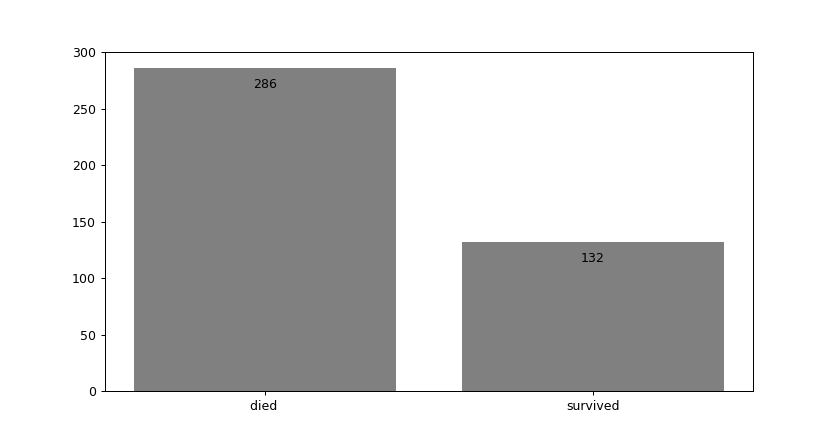

In [166]:
plt.figure()
tempStats = [ (len(newdf[newdf['Survived'] == 0])) ,len(newdf[newdf['Survived'] == 1])]
tempSurvival = ['died ', "survived"]
qwe = plt.bar(x=tempSurvival, height=tempStats,color='grey')
autolabel(qwe)